# <span style='color:#D2691E'> Projet CSI4506 - Stock Market Prédiction - Type 2
-------------------------------------------------------------------------
Présenté à Caroline Barrière 

Par:

Miléna Dionne - 8916596 

Samuel Bédard - 8780205

In [647]:
# Importation des packages pour l'analyse des données
import pandas as pd
import sklearn
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


**1. Obtenir le dataset**

Les données se trouvent dans le fichier data de ce dossier. Ils ont été pris de NASDAQ. 

Vous pouvez obtenir d'autres données à partir de ce lien: https://www.nasdaq.com/market-activity/quotes/historical. 

Pour notre projet, nous avons comparer 8 compagnies. 

In [648]:
#Importer les données des stock_price 2009 jusqu'au 21 Novembre 2019

aapl = pd.read_csv("Data/HistoricalQuotes_AAPL.csv")
msft = pd.read_csv("Data/HistoricalQuotes_MSFT.csv")
amzn = pd.read_csv("Data/HistoricalQuotes_AMZN.csv")
google = pd.read_csv("Data/HistoricalQuotes_GOOGL.csv") #jusqu'en 2012
fb = pd.read_csv("Data/HistoricalQuotes_FB.csv")
baba = pd.read_csv("Data/HistoricalQuotes_BABA.csv") #jusqu'en 2014
jpm = pd.read_csv("Data/HistoricalQuotes_JPM.csv")
tcehy = pd.read_csv("Data/HistoricalQuotes_TCEHY.csv")

In [649]:
aapl[' Close/Last'] = [s.replace('$', '') for s in aapl[' Close/Last']]
aapl[' Low'] = [s.replace('$', '') for s in aapl[' Low']]
aapl[' Open'] = [s.replace('$', '') for s in aapl[' Open']]
aapl[' High'] = [s.replace('$', '') for s in aapl[' High']]

#enter text to read
#exemple:
#aapl

aapl

,Date,Close/Last,Volume,Open,High,Low
0,11-21-2019,262.01,30348780,263.69,264.01,261.18
1,11-20-2019,263.19,26609920,265.54,266.08,260.40
2,11-19-2019,266.29,19069600,267.90,268.00,265.39
3,11-18-2019,267.10,21700900,265.80,267.43,264.23
4,11-15-2019,265.76,25093670,263.68,265.78,263.01
...,...,...,...,...,...,...
2512,11-30-2009,28.56,105960292,28.73,28.81,28.40
2513,11-27-2009,28.66,73814252,28.46,28.99,28.34
2514,11-25-2009,29.17,71610021,29.34,29.38,29.11
2515,11-24-2009,29.21,79299524,29.33,29.41,28.99


In [650]:
aapl[' High'] = aapl[' High'].astype(float)
aapl[' Low'] = aapl[' Low'].astype(float)
aapl[' Close/Last'] = aapl[' Close/Last'].astype(float)
aapl[' Open'] = aapl[' Open'].astype(float)

#aapl.dtypes
aapl['oc_diff']=aapl[' Close/Last']-aapl[' Open']
aapl.head()



,Date,Close/Last,Volume,Open,High,Low,oc_diff
0,11-21-2019,262.01,30348780,263.69,264.01,261.18,-1.68
1,11-20-2019,263.19,26609920,265.54,266.08,260.40,-2.35
2,11-19-2019,266.29,19069600,267.90,268.00,265.39,-1.61
3,11-18-2019,267.10,21700900,265.80,267.43,264.23,1.30
4,11-15-2019,265.76,25093670,263.68,265.78,263.01,2.08


,Close/Last,Volume,Open,High,Low,oc_diff
Date,,,,,,
2019-11-21,262.01,30348780,263.69,264.01,261.18,-1.68
2019-11-20,263.19,26609920,265.54,266.08,260.40,-2.35
2019-11-19,266.29,19069600,267.90,268.00,265.39,-1.61
2019-11-18,267.10,21700900,265.80,267.43,264.23,1.30
2019-11-15,265.76,25093670,263.68,265.78,263.01,2.08
...,...,...,...,...,...,...
2009-11-30,28.56,105960292,28.73,28.81,28.40,-0.17
2009-11-27,28.66,73814252,28.46,28.99,28.34,0.20
2009-11-25,29.17,71610021,29.34,29.38,29.11,-0.17


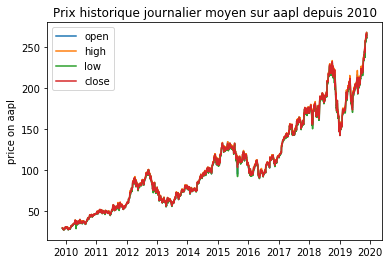

In [651]:
# Initialiser la colonne 1 à la date pour permettre de représenter des graphiques sur le temps 

aapl['Date'] = pd.to_datetime(aapl.Date,format='%m-%d-%Y')
aapl.index = aapl['Date']
aapl = aapl.drop(aapl.columns[[0]], axis=1)


plt.plot(aapl[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur aapl depuis 2010')
plt.legend(['open','high','low','close'])

aapl


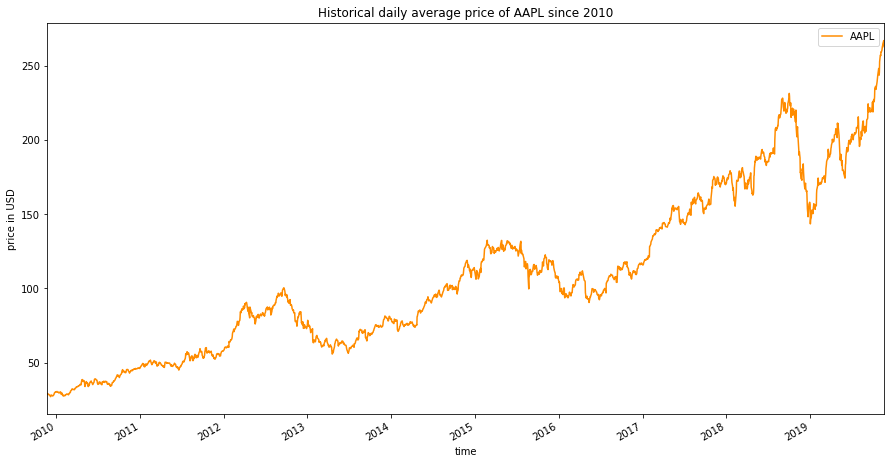

,Close/Last,Volume,Open,High,Low,oc_diff,daily_avg
Date,,,,,,,
2019-11-21,262.01,30348780,263.69,264.01,261.18,-1.68,262.7225
2019-11-20,263.19,26609920,265.54,266.08,260.40,-2.35,263.8025
2019-11-19,266.29,19069600,267.90,268.00,265.39,-1.61,266.8950
2019-11-18,267.10,21700900,265.80,267.43,264.23,1.30,266.1400
2019-11-15,265.76,25093670,263.68,265.78,263.01,2.08,264.5575
...,...,...,...,...,...,...,...
2009-11-30,28.56,105960292,28.73,28.81,28.40,-0.17,28.6250
2009-11-27,28.66,73814252,28.46,28.99,28.34,0.20,28.6125
2009-11-25,29.17,71610021,29.34,29.38,29.11,-0.17,29.2500


In [652]:
#Représentation du montant journalier moyen de 2010 à 2019

aapl['daily_avg'] = (aapl[' Open'] + aapl[' High'] + aapl[' Low'] + aapl[' Close/Last']) / 4
plt.figure(figsize=(15,8))
(aapl['daily_avg']).plot(color='darkorange', label='AAPL')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical daily average price of AAPL since 2010')
plt.legend()
plt.show()


aapl


**Préparation du dataset et prétraitement**

Nous ferons 2 étapes pour préparer le data pour l'expérimentation:  
1. Extraire l'attribut correspondant à la classe que nous voulons prédire pour en faire notre output
2. Séparer le dataset en ensemble d'entraînement et ensemble de test, soit les années 2015 à 2018 pour le train set et l'année 2019 pour le test set. 
3. Nous avons églamenent construit l'ensemble forecast pour permettre de prédire les valeurs dans le futur. 

In [653]:
#Peut exécuter cette cellule une seule fois à cause de la méthode drop () 
aapl=aapl.drop(['oc_diff'], axis=1)
aapl = aapl[:' 2017-01-01 00:00:00' ]

aapl['daily_avg_After_4months']=aapl['daily_avg'].shift(-90)
X_aapl = aapl.dropna().drop(['daily_avg_After_4months','daily_avg'], axis=1)
y_aapl = aapl.dropna()['daily_avg_After_4months']

x_train_aapl = X_aapl.tail(-90)
y_train_aapl = y_aapl.tail(-90)
x_test_aapl = X_aapl.head(90)
y_test_aapl = y_aapl.head(90)
#X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.25, random_state=43)
X_forecast_aapl =  aapl.head(90).drop(['daily_avg_After_4months','daily_avg'], axis=1)

x_test_aapl


,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-11-21,262.01,30348780,263.69,264.01,261.18
2019-11-20,263.19,26609920,265.54,266.08,260.40
2019-11-19,266.29,19069600,267.90,268.00,265.39
2019-11-18,267.10,21700900,265.80,267.43,264.23
2019-11-15,265.76,25093670,263.68,265.78,263.01
...,...,...,...,...,...
2019-07-24,208.67,14991570,207.67,209.15,207.17
2019-07-23,208.84,18355210,208.46,208.91,207.29
2019-07-22,207.22,22277930,203.65,207.23,203.61


## Random Forest Regression 

***Définition du classificateur de Random Forest Regression***   
On défini notre classificateur avec scikit learn.

In [654]:
clf = RandomForestRegressor(n_estimators=200)
clf.fit(x_train_aapl, y_train_aapl)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

***Entraîner du classificateur de régression logistique***  
Maintenant que notre modèle est défini, nous devons entraîner le modèle en utilisant l'ensemble d'entraînement pour prédire la classe *daily_avg_After_Month* pour trouver l'accuracy de nos ensembles. 

Dans le cas où l'ensemble à une mauvaise accuracy, nous pouvons changer les ensembles. 

Ainsi, au début, je voulais prédire les données pour l'année 2020 au complet, mais après avoir entrainer mon modèle je me suis apperçut qu'il était mieux d'utiliser un ensemble test plus petit pour avoir des données plus cohérents. 


In [655]:
def train_model(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        #accuracytrain = clf.score(X_train,y_train)
        #accuracytest = clf.score(X_test, y_test)
        
        error_test = abs(pred - y_test)
        
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error:', round(np.mean(error_test), 2), 'degrees.')
        
        # Calculate mean absolute percentage error (MAPE)
        mape_test = 100 * (error_test / y_test)

        #retourner les résultats 
        accuracy_test = 100 - np.mean(mape_test)
        print('Accuracy of the test set:', round(accuracy_test, 2), '%.')
        
    

In [656]:
result = train_model(x_train_aapl, x_test_aapl, y_train_aapl, y_test_aapl)
print(result)

Random Forest Regressor
Mean Absolute Error: 17.07 degrees.
Accuracy of the test set: 91.38 %.
None


**Représentation graphiquale des ensembles d'entraînements avec les ensembles de prédictions**

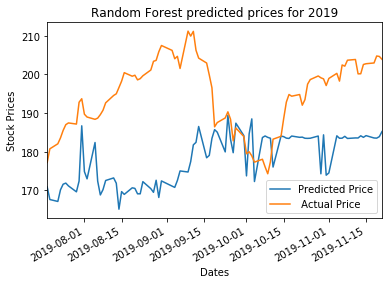

In [657]:
#Comparaison des données réels avec ceux prédits pour le test set. 

pred = clf.predict(x_test_aapl)
prediction_df = x_test_aapl.drop([' Close/Last',' Open', ' Low', ' High', ' Volume'], axis=1)
prediction_df["Price"] = pred
y_test_aapl.columns = ['actual price']

#Build graph with actual and predicted prices 
(prediction_df).plot()
(y_test_aapl).plot()
plt.xlabel("Dates")
plt.ylabel("Stock Prices")
plt.title('Random Forest predicted prices for 2019')
plt.legend(['Predicted Price', ' Actual Price'])
plt.show()




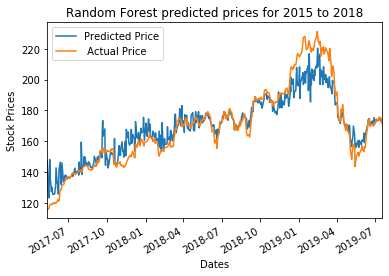

In [658]:
#Comparaison des données réels avec cexu prédits pour le train set. 
pred = clf.predict(x_train_aapl)
prediction_df = x_train_aapl.drop([' Close/Last',' Open', ' Low', ' High', ' Volume'], axis=1)
prediction_df["Price"] = pred

(prediction_df).plot()
(y_train_aapl).plot()
plt.xlabel("Dates")
plt.ylabel("Stock Prices")
plt.title('Random Forest predicted prices for 2015 to 2018')
plt.legend(['Predicted Price', ' Actual Price'])
plt.show()


On peut remarquer que l'ensemble d'entraînement est quasiment semblable à l'ensemble d'entraînement prédit. 

Toutefois, l'ensemble test n'est pas tout à fait pareil ainsi, nous pouvons réduire l'ensemble test pour avoir des données qui coordent mieux. 

### Prédiction des prix du random Forest Regression

In [659]:
def prediction(X, y, X_forecast):
    model = RandomForestRegressor(n_estimators=200)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [660]:
forecasted_aapl = prediction(X_aapl, y_aapl, X_forecast_aapl)
print(forecasted_aapl)

[203.2131    203.5920125 203.9422125 203.1578375 202.8724    202.7428125
 201.36095   201.2137625 203.0037    202.9525375 202.073375  201.040475
 199.470275  200.5754125 199.278425  197.2814875 198.1427625 198.9912875
 199.2267625 198.23245   197.58845   194.9687125 193.043275  193.9607875
 191.1313625 191.7620875 191.3069375 189.61975   187.0294125 184.324775
 179.6897125 177.5342625 178.43935   177.8069875 178.14315   182.40815
 182.946075  178.7823375 184.2899375 187.1549    185.3328    188.7439375
 190.0094625 189.8072    188.3157125 187.2633875 191.3473125 193.5099875
 197.2742875 197.796825  196.1018875 201.6318125 200.07685   201.938425
 196.5049    200.1236875 196.9109    196.3550625 197.2370375 196.7904625
 194.1688    191.3230875 193.6762    193.59595   198.9127625 197.988175
 194.4770375 192.987     194.4550625 189.7461125 186.0860125 187.1804875
 188.735925  187.122725  183.9202875 183.6032375 183.6988375 186.3309875
 187.5672625 188.54215   190.8834625 186.4638    186.2752

In [661]:

last_date=aapl.iloc[1].name
modified_date = last_date + dt.timedelta(days=1)
new_date = pd.date_range(modified_date,periods=90,freq='D')

# assign prediction to newly defined index
forecasted_aapl = pd.DataFrame(forecasted_aapl, columns=['daily_avg'], index=new_date)

# combine historical price and predicted price
aapl = pd.concat([aapl[['daily_avg']], forecasted_aapl])
print(aapl)


             daily_avg
2019-11-21  262.722500
2019-11-20  263.802500
2019-11-19  266.895000
2019-11-18  266.140000
2019-11-15  264.557500
...                ...
2020-02-14  184.947675
2020-02-15  184.798000
2020-02-16  181.843062
2020-02-17  180.264025
2020-02-18  180.562200

[818 rows x 1 columns]


2019-11-21    262.722500
2019-11-20    263.802500
2019-11-19    266.895000
2019-11-18    266.140000
2019-11-15    264.557500
                 ...    
2020-02-14    184.947675
2020-02-15    184.798000
2020-02-16    181.843062
2020-02-17    180.264025
2020-02-18    180.562200
Name: daily_avg, Length: 818, dtype: float64


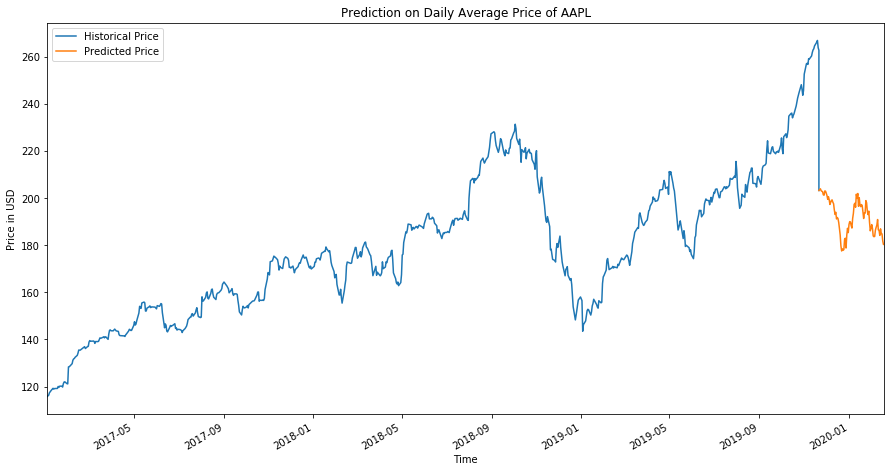

Selon la prédiction sur les trois prochains mois, il se pourrait que apple perd de la valeur selon le random forest Regression. Je crois que ce n'est peut probable puisque Noel arrive a grand pas. 


In [663]:
print(aapl['daily_avg'])
plt.figure(figsize=(15,8))
(aapl[:-89]['daily_avg']).plot(label='Historical Price')
(aapl[-90:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of AAPL')
plt.legend()
plt.show()
print("Selon la prédiction sur les trois prochains mois, il se pourrait que apple perd de la valeur selon le random forest Regression. Je crois que ce n'est peut probable puisque Noel arrive a grand pas. ")

## perceptron multi couche


### Formating des datasets

In [918]:
def formatDataSet (dataset): 
    predict_1week = []
    future1week = []
    day1before = []
    day2before = []
    day3before = []
    day4before = []
    day5before = []
    day6before = []
    today = []
    count = 7
    while(count < len(dataset)-14):
        future1week.append(dataset[' Close/Last'][count])
        today.append(dataset[' Close/Last'][count+7])
        day1before.append(dataset[' Close/Last'][count+8])
        day2before.append(dataset[' Close/Last'][count+9])
        day3before.append(dataset[' Close/Last'][count+10])
        day4before.append(dataset[' Close/Last'][count+11])
        day5before.append(dataset[' Close/Last'][count+12])
        day6before.append(dataset[' Close/Last'][count+13])
        count+= 1
    data = {'future1week':future1week, 
            'today':today,
            'day1before':day1before,
            'day2before':day2before,
            'day3before':day3before,
            'day4before':day4before,
            'day5before':day5before,
            'day6before':day6before,}
    return pd.DataFrame(data)

In [919]:
type(aapl)
new_format_aapl = formatDataSet(aapl)



KeyError: ' Close/Last'

In [920]:
new_format_aapl

,today,day1before,day2before,day3before,day4before,day5before,day6before
0,255.82,248.76,243.26,243.29,249.05,246.58,243.58
1,248.76,243.26,243.29,249.05,246.58,243.58,243.18
2,243.26,243.29,249.05,246.58,243.58,243.18,239.96
3,243.29,249.05,246.58,243.58,243.18,239.96,240.51
4,249.05,246.58,243.58,243.18,239.96,240.51,236.41
...,...,...,...,...,...,...,...
2491,28.26,27.12,26.99,27.62,28.07,28.03,28.14
2492,27.12,26.99,27.62,28.07,28.03,28.14,28.56
2493,26.99,27.62,28.07,28.03,28.14,28.56,28.66
2494,27.62,28.07,28.03,28.14,28.56,28.66,29.17


### creating test and traning set

In [921]:
y = new_format_aapl.pop("future1week").values

KeyError: 'future1week'

In [922]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_format_aapl, y, test_size = 0.15, random_state=1)


In [923]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = (20, 40), solver = 'adam', alpha = 0.0001, max_iter = 400, warm_start  = True)


In [924]:
def train_model(clf, X_train, y_train, epochs=10):
    """
    Cette fonction entraîne un model spécifié et retourne une liste 
    de résultats.
    
    :param clf: modèle scikit learn
    :param X_train: données d'entraînement encodés (attributs)
    :param y_train: données d'entraînement (classe à prédire)
    :param epochs: défault = 10, nombre d'itérations
    :return: résultats (accuracy) pour les données d'entraînement
    """
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

In [925]:
result = train_model(model, X_train, y_train, epochs=10)
print(result)

Starting training...
Epoch:1/10
Epoch:2/10
Epoch:3/10
Epoch:4/10
Epoch:5/10
Epoch:6/10
Epoch:7/10
Epoch:8/10
Epoch:9/10
Epoch:10/10
Done training.
[0.9909109626640215, 0.991052454937613, 0.9878675098271992, 0.990338937141702, 0.9908862844738412, 0.9899630419383576, 0.9911374369938903, 0.988577119565243, 0.9910618751388495, 0.9908724819849443]


In [926]:
y_predict = model.predict(X_test[0:20])
print(y_predict)
print(y_test[0:20])

[118.82063076 172.91641904 176.11384269  62.54204509  96.03480652
 161.79819345  99.88318892 173.64318358  96.34683465 157.13837014
  57.84247558  32.26581788  32.43053096 116.60936933  64.26657529
 128.40177331  93.97111731 176.54599158 219.44848487  35.64209292]
[118.3  174.33 194.19  65.1   91.56 164.    94.48 175.85  93.23 160.47
  59.72  31.75  32.38 112.65  61.   128.79  87.08 172.23 219.7   35.76]


In [927]:
def errorTest (model, x_test, y_test):
    y_predict = model.predict(x_test).tolist()
    y_result = y_test.tolist()
    sum = 0
    for i in range(0, len(y_test)-1):
        sum += abs((float(y_predict[i]) - float(y_result[i])) / float(y_result[i]))
    return sum/len(y_test)

In [928]:
error = errorTest(model, X_test, y_test)
error

0.03199470795299135

In [432]:
def precision(model, x_test, y_test):
    y_predict = model.predict(x_test).tolist()
    y_result = y_test.tolist()
    today = x_test['today'].tolist()
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(0, len(y_test) -1):
        if((float(y_predict[i]) - float(today[i])) > 0 and (float(y_result[i]) - float(today[i])) > 0):
            tp += 1
        elif ((float(y_predict[i]) - float(today[i])) <= 0 and (float(y_result[i]) - float(today[i])) > 0):
            fn += 1
        elif ((float(y_predict[i]) - float(today[i])) > 0 and (float(y_result[i]) - float(today[i])) <= 0):
            fp += 1
        else:
            tn += 1
    print("tp: " + str(tp))
    print("tn: " + str(tn))
    print("fp: " + str(fp))
    print("fn: " + str(fn))
    print("precision: " + str(tp/(tp+fp)))
    print("rappel: " + str(tp/(tp+fn)))       

In [433]:
precision(model, X_test, y_test)


tp: 204
tn: 5
fp: 158
fn: 7
precision: 0.56353591160221
rappel: 0.966824644549763
